In [19]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

class visualization():

    def __init__(self):
        train = pd.read_csv('train.csv')
        test = pd.read_csv('test.csv')
        data = pd.concat([train, test], axis=0)

        # 2. 处理缺失值
        from sklearn.impute import SimpleImputer
        num_features = data.select_dtypes(include=['float64', 'int64']).columns  # 自动识别数值型特征
        cat_features = data.select_dtypes(include=['object']).columns  # 自动识别类别型特征

        # 使用 SimpleImputer 填充缺失值
        num_imputer = SimpleImputer(strategy='mean')  # 数值型特征使用均值填充
        data[num_features] = num_imputer.fit_transform(data[num_features])
        cat_imputer = SimpleImputer(strategy='most_frequent')  # 类别型特征使用众数填充
        data[cat_features] = cat_imputer.fit_transform(data[cat_features])


        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        catagory = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
        for col in catagory:
            data[col] = label_encoder.fit_transform(data[col])

        self.data = data


    def plot(self, columns = None):
        labels = self.data['stroke']
        # 删除 'stroke' 列以避免将其作为特征
        data = self.data.drop('stroke', axis=1)
        if columns == None:
            columns = data.columns
        # 对数据进行t-SNE降维
        tsne = TSNE(n_components=2, random_state=42, n_iter = 2000)
        data_tsne = tsne.fit_transform(data[columns])

        # 可视化
        plt.figure(figsize=(10, 8))
        # 根据 'stroke' 的值使用不同的颜色
        plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='coolwarm', alpha=0.5)
        plt.title('t-SNE Visualization of Merged Dataset')
        plt.xlabel('t-SNE component 1')
        plt.ylabel('t-SNE component 2')
        plt.colorbar(label='Stroke (0 = No, 1 = Yes)')  # 添加颜色条说明
        plt.show()


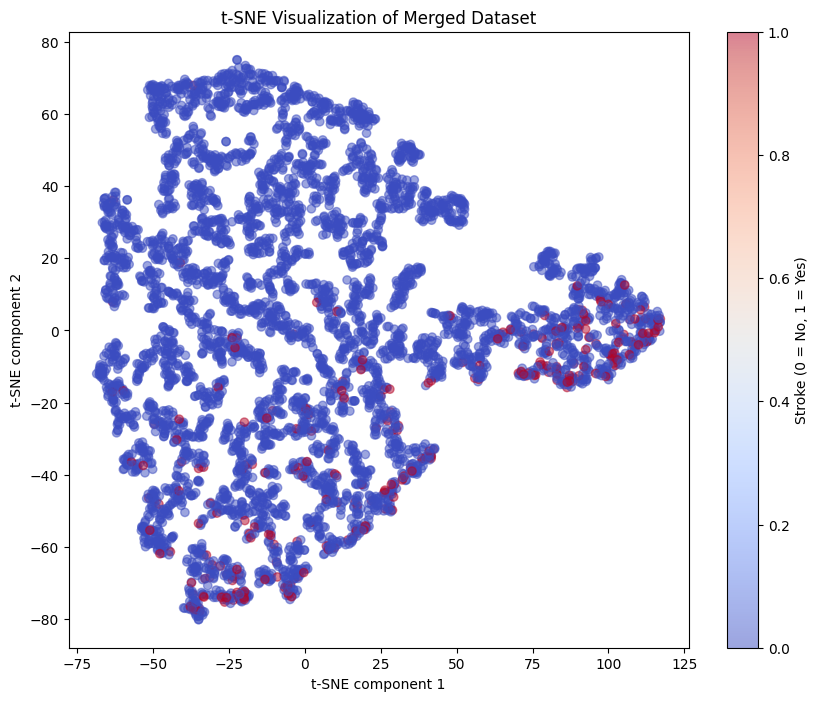

In [20]:
vis = visualization()
vis.plot()

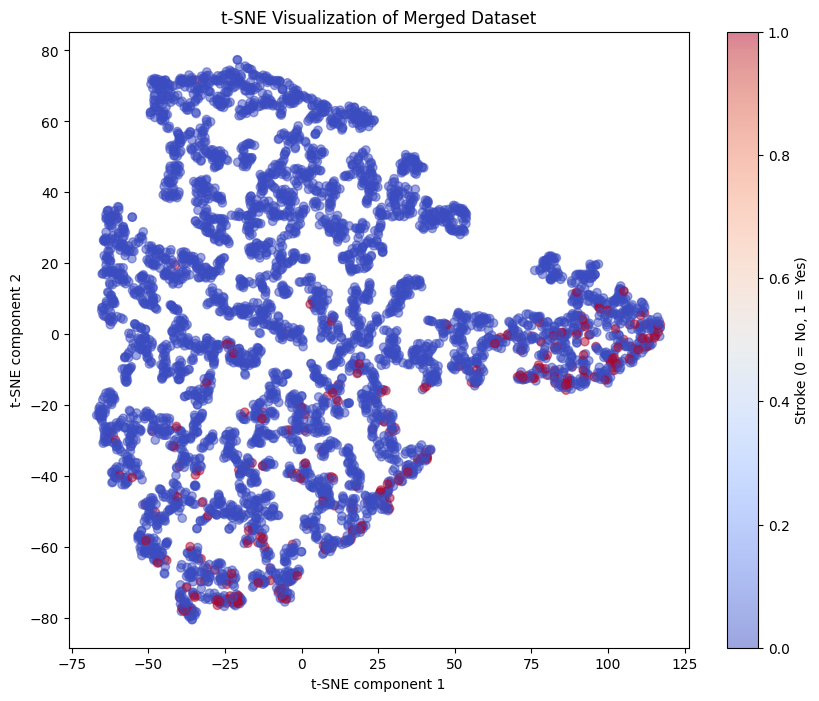

In [22]:
vis.plot(columns = ['age', 'bmi', 'avg_glucose_level'])

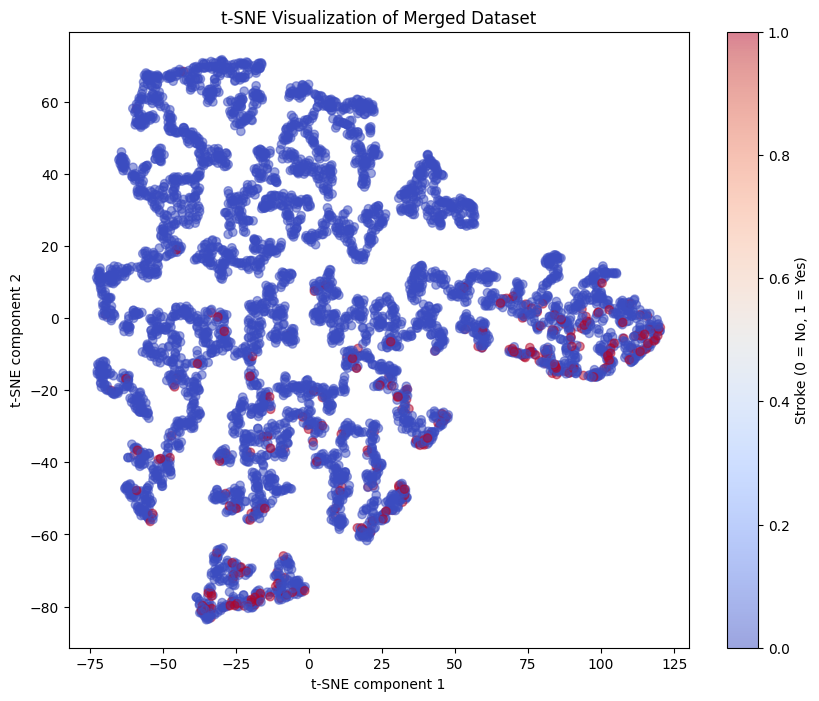

In [23]:
vis.plot(columns = ['age', 'avg_glucose_level', 'ever_married', 'Residence_type', 'smoking_status'])